------

In [4]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import os 
import seaborn as sns
import glob

## [VOC dataset] parsing  inst *.mat files

In [5]:
import scipy.io as sio

In [6]:
mat_dir = ""
mat_list = glob.glob("/Users/hyunkim/Downloads/voc/benchmark_RELEASE/dataset/inst/*.mat")

/Users/hyunkim/Downloads/voc/benchmark_RELEASE/dataset/inst/2010_004703.mat
/Users/hyunkim/Downloads/voc/benchmark_RELEASE/dataset/img/2010_004703.jpg


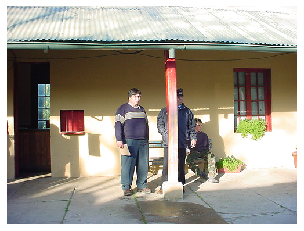

In [81]:
mat = mat_list[13]
print(mat)
mask = sio.loadmat(mat)

img_dir = "/Users/hyunkim/Downloads/voc/benchmark_RELEASE/dataset/img/"
img_path = img_dir + mat[-15:-3] + "jpg"
print(img_path)
img = cv2.imread(img_path, cv2.IMREAD_COLOR)[:,:,::-1]

plt.imshow(img)
plt.axis("off")
plt.show()

## label 데이터 구조 분석 


Label in "GTinst"

mask["GTinst][0][0] 안에 데이터 3개 존재

1. Int 값으로 그레이스케일 이미지 각 숫자가 각 클래스 의미하는 것으로 사료됨; 0: background(같아보인다.)
2. 각 인스턴스에 해당하는 테두리 클래스와 무관하게 정렬되어 있다.
3. 각 인스턴스의 클래스 사람 클래스는 15



#### VOC  benchmark Instance segmentation 라벨 필터링 방법 

1. 이미지 마스크 정보를 불러온다. 
2. 마스크 정보의 라벨 중 15 번 클래스가 존재하면 
  - 2.1. 15번 클래스에 해당하는 인덱스를 구한다. 
  - 2.2. 해당 인덱스의 번호를 기준으로 그와 같으면 1 아니면 0으로 라벨 그레이스케일 이미지를 변환한다.
  - 2.3. 그레이스케일 이미지를 변환했을 때 전체 픽셀중 1인 픽셀의 갯수가 전체의 {threshold}%이상이 아니라면 제외 아니라면 데이터 셋에 포함시킨다. 
3. pass

In [82]:
mask.keys()

dict_keys(['__header__', '__version__', '__globals__', 'GTinst'])

In [83]:
mask["__header__"]

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Jan  8 04:31:53 2012'

In [84]:
np.unique(mask["GTinst"][0][0][0])

array([0, 1, 2, 3, 4, 5], dtype=uint8)

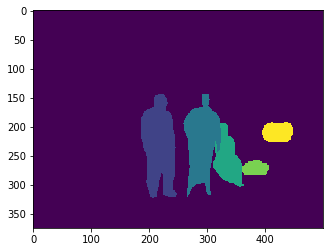

In [85]:
plt.imshow(mask["GTinst"][0][0][0])

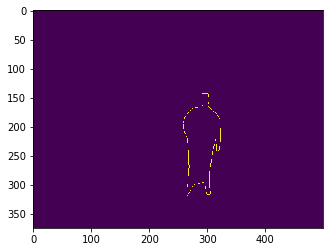

In [86]:
plt.imshow(mask["GTinst"][0][0][1][1][0].toarray())

In [87]:
np.unique(mask["GTinst"][0][0][1][1][0].toarray(), return_counts=True)

(array([0, 1], dtype=uint8), array([187025,    475]))

In [88]:
mask["GTinst"][0][0][2]

array([[15],
       [15],
       [15],
       [16],
       [16]], dtype=uint8)

In [ ]:
list(mask.items())[3][1][0][0][2]

In [ ]:
plt.imshow(list(mask.items())[3][1][0][0][0], cmap="gray")

In [ ]:
list(mask.items())[3][1][0][0][0].max()

In [ ]:
for mat in mat_list:
    mask = scipy.io.loadmat(mat)
    filename = mat.split("/")[-1][:-3]
    cv2.imwrite("./data/uv_mask/" + filename + "jpg", mask['mask']*255)